In [15]:
#library pembantu

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#dataset merupakan data set baru yang sudah di scale pada tahap eksplorasi data

data_model = pd.read_csv('data_model.csv')
data_model

,Umur,Umur_Kendaraan
0,0.153846,0.0
1,0.430769,1.0
2,0.015385,0.0
3,0.584615,0.5
4,0.461538,1.0
...,...,...
285826,0.046154,0.0
285827,0.015385,0.0
285828,0.046154,0.0
285829,0.738462,0.5


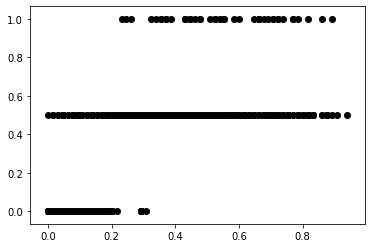

In [17]:
#memilih sample data sebanyak 1000 baris, agar proses running tidak begitu lama

downsampling_scaled_df = data_model.sample(1000)
plt.scatter(downsampling_scaled_df["Umur"],downsampling_scaled_df["Umur_Kendaraan"],c='black')

plt.show()

In [18]:
#KMeans Clustering menggunakan method random

def KMeans1(k,data):
    #Step 1 = tentukan jumlah cluster(disini melalui parameter)
    
    diff = 1 #random assign difference, untuk ngecek perbedaan centroid awal dan baru
    j=0
    
    #Step 2 = insiasi random centroids dari data model
    centroids = (data.sample(k))

    #loop berhenti sampai posisi centroid sebelumnya dan sesudahnya sama
    while(diff!=0): #ketika centroids sebelumnya dan centroid baru tidak sama, lakukan looping
        
        dataD=data
        
        #step 3 = mengelompokkan points ke centroid terdekat
        #menghitung jarak setiap point ke setiap centroids menggunakan euclidean
        i=1
        for index1,row_centroid in centroids.iterrows():
            Euclidean=[]
            for index2,row_d in dataD.iterrows():
                X=(row_centroid['Umur']-row_d['Umur'])**2
                Y=(row_centroid['Umur_Kendaraan']-row_d["Umur_Kendaraan"])**2
                ed=np.sqrt(X+Y)
                Euclidean.append(ed)
            data[i]=Euclidean
            i+=1

        label=[]

        #mengelompokkan point berdasarkan jarak terdekat points dengan centroid
        for index,row in data.iterrows():
            min_distance=row[1]
            pos=1
            for i in range(k):
                if row[i+1] < min_distance:
                    min_distance = row[i+1]
                    pos=i+1
            label.append(pos)

        #menambahkan kolom Labels untuk mengkategorikan kelompok
        data["Labels"]=label

        #step 4 = cari centroids baru
        #cari centroid baru dari rata-rata posisi di tiap cluster
        centroids_new = data.groupby(["Labels"]).mean()[["Umur","Umur_Kendaraan"]]
        if j == 0:
            diff=1
            j=j+1
        else:
            #perbedaan selisih titik koordinat antar centroid
            diff = (centroids_new['Umur'] - centroids['Umur']).sum() + (centroids_new['Umur_Kendaraan'] - centroids['Umur_Kendaraan']).sum()
            
        centroids = centroids_new
    
    return data

In [19]:
#KMeans Clustering menggunakan method k-means++

import random as rd

def KMeans2(k,data):
    #Step 1 = tentukan jumlah cluster(disini melalui parameter)
    
    diff = 1 #random assign difference, untuk ngecek perbedaan centroid awal dan baru
    j=0
    
    #Step 2 = insiasi random centroids menggunakan random uniform
    centroids = []
    for i in range(k):
        centroid_x = np.random.uniform(min(data.iloc[:,0]),max(data.iloc[:,0]))
        centroid_y = np.random.uniform(max(data.iloc[:,1]),max(data.iloc[:,1]))
        centroids.append([centroid_x,centroid_y])

    #step 5 = ulangi step 3 dan 4 sampai posisi centroid sudah terpusat
    #loop berhenti sampai posisi centroid sebelumnya dan sesudahnya sama
    while(diff!=0): #ketika centroids sebelumnya dan centroid baru tidak sama, lakukan looping
        
        
        
        #step 3 = mengelompokkan points ke centroid terdekat
        #menghitung jarak setiap point ke setiap centroids menggunakan euclidean
        dataD=data
        i=1
        for idx_centroids in centroids:
            Euclidean=[]
            for index2,row_d in dataD.iterrows():
                X=(idx_centroids[0]-row_d['Umur'])**2
                Y=(idx_centroids[1]-row_d["Umur_Kendaraan"])**2
                ed=np.sqrt(X+Y)
                Euclidean.append(ed)
            data[i]=Euclidean
            i+=1

        label=[]

        #mengelompokkan point berdasarkan jarak terdekat points dengan centroid
        for index,row in data.iterrows():
            min_distance=row[1]
            pos=1
            for i in range(k):
                if row[i+1] < min_distance:
                    min_distance = row[i+1]
                    pos=i+1
            label.append(pos)

        #menambahkan kolom Labels untuk mengkategorikan kelompok
        data["Labels"]=label

        #step 4 = cari centroids baru
        #cari centroid baru dari rata-rata posisi di tiap cluster
        centroids_new = data.groupby(["Labels"]).mean()[["Umur","Umur_Kendaraan"]].values.tolist()
        if j == 0:
            diff=1
            j=j+1
        else:
            for c1,c2 in zip(centroids,centroids_new):
                #menghitung jarak tiap centroid awal dan baru
                diff = np.sqrt(sum(np.square(np.array(c1)-np.array(c2))))
            
        centroids = centroids_new
    
    return data

In [20]:
#hitung Sum of Square Error (SSE)

def wcss(data):
    new_data = pd.DataFrame(data)                                    #buat dataframebaru dengan isi 'data'
    for i in range(len(new_data['Labels'].unique())):                #looping sebanyak jumlah kluster
        new_data[i+1] = new_data[i+1]**2                             #data kolom i+1 dipangkatkan 
        
    cluster_n = []                                                   #buat list kosong
    for idx,row in new_data.groupby('Labels').sum().iterrows():      #iterasikan row dari dataframe yang telah dijumlahkan dan dikelompokkan berdasarkan labels
        cluster_n.append(row[idx])                                   #ambil nilai dengan nama kolom idx, dan masukkan kedalam list
        
    return np.sum(cluster_n)                                         

In [33]:
#Eksperimen menggunakan KMeans Clustering method random

data_cluster1 = KMeans1(3,downsampling_scaled_df.copy())
data_cluster1

,Umur,Umur_Kendaraan,1,2,3,Labels
272001,0.400000,0.5,0.607478,0.043467,0.545685,2
197744,0.000000,0.0,0.054994,0.683320,0.181432,1
52942,0.615385,0.5,0.751024,0.197242,0.662053,2
221709,0.153846,0.0,0.098852,0.600684,0.027586,3
95529,0.292308,0.5,0.553460,0.134814,0.512146,2
...,...,...,...,...,...,...
169577,0.430769,1.0,1.068273,0.462462,1.030616,2
102661,0.861538,0.5,0.948954,0.441380,0.844123,2
190950,0.584615,0.5,0.728354,0.167141,0.642306,2
24261,0.276923,0.5,0.547040,0.149649,0.509037,2


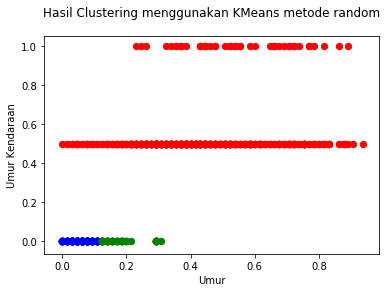

In [34]:
#visualisasi hasil Eksperimen

fig5,ax5 = plt.subplots()

ax5.scatter(data_cluster1['Umur'][data_cluster1.Labels == 1],
            data_cluster1['Umur_Kendaraan'][data_cluster1.Labels == 1],
           c='b',s=40)
ax5.scatter(data_cluster1['Umur'][data_cluster1.Labels == 2],
            data_cluster1['Umur_Kendaraan'][data_cluster1.Labels == 2],
           c='r',s=40)
ax5.scatter(data_cluster1['Umur'][data_cluster1.Labels == 3],
            data_cluster1['Umur_Kendaraan'][data_cluster1.Labels == 3],
           c='green',s=40)

ax5.set_xlabel('Umur')
ax5.set_ylabel('Umur Kendaraan')
ax5.set_title('Hasil Clustering menggunakan KMeans metode random',pad=20)

plt.show()

In [43]:
#jalankan pemodelan KMeans Clustering method k-means++

data_cluster2 = KMeans2(3,downsampling_scaled_df.copy())
data_cluster2

,Umur,Umur_Kendaraan,1,2,3,Labels
272001,0.400000,0.5,0.062352,0.308360,0.592365,1
197744,0.000000,0.0,0.623501,0.912400,0.082357,3
52942,0.615385,0.5,0.274714,0.121171,0.730834,2
221709,0.153846,0.0,0.554380,0.801559,0.071489,3
95529,0.292308,0.5,0.053767,0.412409,0.542291,1
...,...,...,...,...,...,...
169577,0.430769,1.0,0.486609,0.485806,1.058957,2
102661,0.861538,0.5,0.520464,0.190793,0.925809,2
190950,0.584615,0.5,0.244052,0.143137,0.708705,2
24261,0.276923,0.5,0.068132,0.427420,0.536522,1


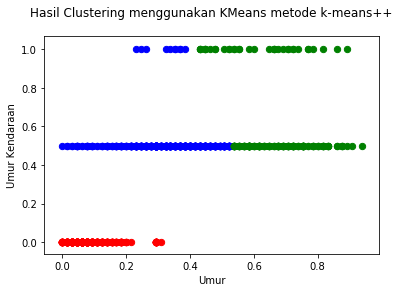

In [45]:
#visualisasi hasil pemodelan

plt.scatter(data_cluster2['Umur'][data_cluster2.Labels == 1],
            data_cluster2['Umur_Kendaraan'][data_cluster2.Labels == 1],
           c='b',s=40)
plt.scatter(data_cluster2['Umur'][data_cluster2.Labels == 2],
            data_cluster2['Umur_Kendaraan'][data_cluster2.Labels == 2],
           c='green',s=40)
plt.scatter(data_cluster2['Umur'][data_cluster2.Labels == 3],
            data_cluster2['Umur_Kendaraan'][data_cluster2.Labels == 3],
           c='r',s=40)

plt.xlabel('Umur')
plt.ylabel('Umur Kendaraan')
plt.title('Hasil Clustering menggunakan KMeans metode k-means++',pad=20)

plt.show()

In [25]:
#menghitung nilai SSE clustering KMeans method k-means++ untuk mencari k optimum mulai dari k = 1 sampai k = 10. (

wcss_value = []
for i in range(1,11):
    KM = KMeans2(i,downsampling_scaled_df.copy())
    k_N = wcss(KM)
    wcss_value.append(k_N)


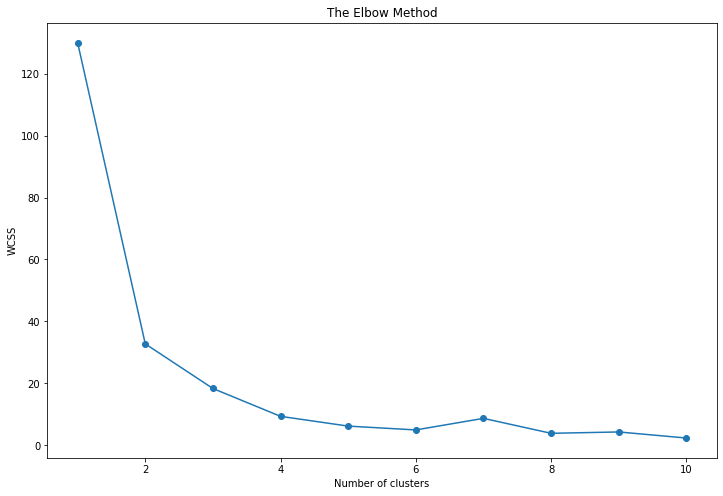

In [26]:
#visualisasi nilai SSE dari k = 1 sampai k = 10

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(1,11),wcss_value,marker='o')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')
ax1.set_title('The Elbow Method')
plt.show()